In [59]:
import pandas as pd

In [60]:
campaign_master = pd.read_csv("../input/campaign_master.csv")
len(campaign_master)

3

In [61]:
campaign_master.head()

,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [62]:
class_master = pd.read_csv("../input/class_master.csv")
len(class_master)

3

In [63]:
class_master.head()

,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [64]:
customer_master = pd.read_csv("../input/customer_master.csv")
len(customer_master)

4192

In [65]:
customer_master.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [66]:
use_log = pd.read_csv("../input/use_log.csv")
len(use_log)

197428

In [67]:
use_log.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [68]:
join_data = pd.merge(
    customer_master,
    class_master,
    on="class",
    how="left",
)
join_data = pd.merge(
    join_data,
    campaign_master,
    on="campaign_id",
    how="left",
)

join_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [69]:
join_data.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [70]:
join_data.groupby("class_name").count()["customer_id"]

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [71]:
join_data.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [72]:
join_data.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [73]:
join_data.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [74]:
join_data["start_date"] = pd.to_datetime(join_data["start_date"])
customer_start = join_data.loc[join_data["start_date"] > pd.to_datetime("20180401")]
len(customer_start)

1361

In [75]:
join_data["end_date"] = pd.to_datetime(join_data["end_date"])
customer_newer = join_data.loc[
    (join_data["end_date"] >= pd.to_datetime("20190331")) | (join_data["end_date"].isna())
]
len(customer_newer)

2953

In [76]:
customer_newer["end_date"].unique()

array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [77]:
customer_newer.groupby("class_name").count()["customer_id"]

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

In [78]:
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

In [79]:
customer_newer.groupby("gender").count()["customer_id"]

gender
F    1400
M    1553
Name: customer_id, dtype: int64

In [80]:
use_log["usedate"] = pd.to_datetime(use_log["usedate"])
use_log["年月"] = use_log["usedate"].dt.strftime("%Y%m")
uselog_months = use_log.groupby(
    ["年月", "customer_id"], 
    as_index=False
).count()

uselog_months.rename(
    columns={"log_id":"count"},
    inplace=True
)

uselog_months = pd.DataFrame(uselog_months)
#uselog_months
uselog_months = uselog_months.drop("usedate", axis=1)
uselog_months.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [81]:
uselog_customer = uselog_months.groupby("customer_id").agg(["mean", "median", "max", "min"])["count"]
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [83]:
use_log["weekday"] = use_log["usedate"].dt.weekday

uselog_weekday = use_log.groupby(
    ["customer_id", "年月", "weekday"], 
    as_index=False
).count()[["customer_id", "年月", "weekday", "log_id"]]

uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)

uselog_weekday.head()

,customer_id,年月,weekday,count,routine_flg
0,AS002855,201804,5,4,1
1,AS002855,201805,2,1,0
2,AS002855,201805,5,4,1
3,AS002855,201806,5,5,1
4,AS002855,201807,1,1,0


In [89]:
join_data = pd.merge(
    join_data, 
    uselog_customer, 
    on="customer_id",
    how="left",
)

join_data = pd.merge(
    join_data, 
    uselog_weekday[["customer_id", "routine_flg"]], 
    on="customer_id",
    how="left",
)

join_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,...,mean_y,median_y,max_y,min_y,routine_flg_y,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,...,4.833333,5.0,8,2,0,4.833333,5.0,8,2,0
1,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,...,4.833333,5.0,8,2,0,4.833333,5.0,8,2,0
2,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,...,4.833333,5.0,8,2,0,4.833333,5.0,8,2,1
3,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,...,4.833333,5.0,8,2,0,4.833333,5.0,8,2,1
4,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,...,4.833333,5.0,8,2,0,4.833333,5.0,8,2,0


In [90]:
join_data.isnull().sum()

customer_id                 0
name                        0
class                       0
gender                      0
start_date                  0
end_date             64959093
campaign_id                 0
is_deleted                  0
class_name                  0
price                       0
campaign_name               0
mean_x                      0
median_x                    0
max_x                       0
min_x                       0
routine_flg_x               0
calc_date                   0
membership_period           0
mean_y                      0
median_y                    0
max_y                       0
min_y                       0
routine_flg_y               0
mean                        0
median                      0
max                         0
min                         0
routine_flg                 0
dtype: int64

In [ ]:
from dateutil.relativedelta import relativedelta

join_data["calc_date"] = join_data["end_date"]
join_data["calc_date"] = join_data["calc_date"].fillna(pd.to_datetime("20190430"))
join_data["membership_period"] = 0

for i in range(len(join_data)):
    delta = relativedelta(join_data["calc_date"].iloc[i], join_data["start_date"].iloc[i])
    join_data["membership_period"].iloc[i] = delta.years*12 + delta.months

join_data.head()

/Users/akifumiabe/.conda/envs/cat-in-the-dat-ii/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
join_data[["mean", "median", "max", "min"]].describe()

In [53]:
join_data.groupby("routine_flg").count()["customer_id"]

routine_flg
0    70469
1    22864
Name: customer_id, dtype: int64

/Users/akifumiabe/.conda/envs/cat-in-the-dat-ii/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='membership_period', ylabel='Density'>

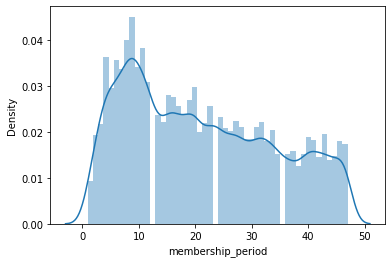

In [55]:
import seaborn as sns
sns.distplot(join_data["membership_period"])

In [57]:
customer_end = join_data.loc[join_data["is_deleted"]==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,19662.0,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000
mean,1.0,8646.170278,4.253671,3.991608,7.516173,1.698759,0.056403,8.494660
std,0.0,1947.676619,0.930684,1.052525,1.945684,0.884591,0.230705,4.746388
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,7500.000000,3.727273,3.000000,7.000000,1.000000,0.000000,5.000000
50%,1.0,10500.000000,4.250000,4.000000,8.000000,1.000000,0.000000,8.000000
75%,1.0,10500.000000,4.800000,5.000000,9.000000,2.000000,0.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [58]:
customer_stay = join_data.loc[join_data["is_deleted"]==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,73671.0,73671.000000,73671.000000,73671.000000,73671.000000,73671.000000,73671.000000,73671.000000
mean,0.0,8559.473877,5.999962,5.995982,8.570238,3.449824,0.295299,24.372263
std,0.0,1971.708976,1.390840,1.438464,1.544122,1.725275,0.456180,12.457883
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.916667,5.000000,7.000000,2.000000,0.000000,14.000000
50%,0.0,7500.000000,5.666667,6.000000,8.000000,3.000000,0.000000,24.000000
75%,0.0,10500.000000,7.000000,7.000000,10.000000,4.000000,1.000000,34.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [47]:
join_data.to_csv("../input/customer_join.csv", index=False)